[[2.3]
 [4.4]
 [3.7]
 [6.1]
 [7.3]
 [2.1]
 [5.6]
 [7.7]
 [8.7]
 [4.1]
 [6.7]
 [6.1]
 [7.5]
 [2.1]
 [7.2]
 [5.6]
 [5.7]
 [7.7]
 [3.1]]
[[3.7 ]
 [4.76]
 [4.  ]
 [7.1 ]
 [8.6 ]
 [3.5 ]
 [5.4 ]
 [7.6 ]
 [7.9 ]
 [5.3 ]
 [7.3 ]
 [7.5 ]
 [8.5 ]
 [3.2 ]
 [8.7 ]
 [6.4 ]
 [6.6 ]
 [7.9 ]
 [5.3 ]]


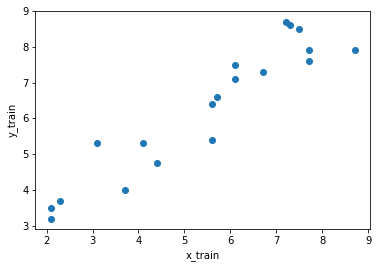

Epoch [5/1000], Loss: 67.1769
Epoch [10/1000], Loss: 32.9712
Epoch [15/1000], Loss: 16.3317
Epoch [20/1000], Loss: 8.2372
Epoch [25/1000], Loss: 4.2995
Epoch [30/1000], Loss: 2.3837
Epoch [35/1000], Loss: 1.4516
Epoch [40/1000], Loss: 0.9979
Epoch [45/1000], Loss: 0.7770
Epoch [50/1000], Loss: 0.6693
Epoch [55/1000], Loss: 0.6166
Epoch [60/1000], Loss: 0.5908
Epoch [65/1000], Loss: 0.5780
Epoch [70/1000], Loss: 0.5715
Epoch [75/1000], Loss: 0.5682
Epoch [80/1000], Loss: 0.5663
Epoch [85/1000], Loss: 0.5651
Epoch [90/1000], Loss: 0.5644
Epoch [95/1000], Loss: 0.5637
Epoch [100/1000], Loss: 0.5632
Epoch [105/1000], Loss: 0.5627
Epoch [110/1000], Loss: 0.5622
Epoch [115/1000], Loss: 0.5618
Epoch [120/1000], Loss: 0.5613
Epoch [125/1000], Loss: 0.5609
Epoch [130/1000], Loss: 0.5604
Epoch [135/1000], Loss: 0.5600
Epoch [140/1000], Loss: 0.5596
Epoch [145/1000], Loss: 0.5591
Epoch [150/1000], Loss: 0.5587
Epoch [155/1000], Loss: 0.5582
Epoch [160/1000], Loss: 0.5578
Epoch [165/1000], Loss: 0

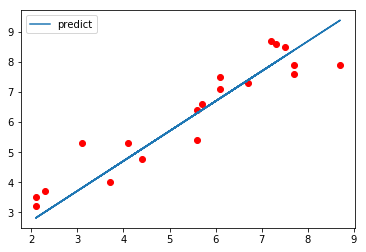

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable


# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001

x_train = np.array([[2.3], [4.4], [3.7], [6.1], [7.3], [2.1],[5.6], [7.7], [8.7], [4.1],

                    [6.7], [6.1], [7.5], [2.1], [7.2],

                    [5.6], [5.7], [7.7], [3.1]], dtype=np.float32)

#xtrain生成矩阵数据

y_train = np.array([[3.7], [4.76], [4.], [7.1], [8.6], [3.5],[5.4], [7.6], [7.9], [5.3],

                    [7.3], [7.5], [8.5], [3.2], [8.7],

                    [6.4], [6.6], [7.9], [5.3]], dtype=np.float32)

print(x_train)
print(y_train)

plt.figure() 
#画图散点图
plt.scatter(x_train,y_train)
plt.xlabel('x_train')
#x轴名称
plt.ylabel('y_train')
#y轴名称
#显示图片
plt.show()

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data))
        
# Plot the graph



model.eval()
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, predicted, label='predict')
plt.legend()
plt.show()